# Aerofit Project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"D:\DSML class\Real world data assignments\Python\Aerofit\d2beiqkhq929f0.cloudfront.net_public_assets_assets_000_001_125_original_aerofit_treadmill.csv")

In [3]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


## Basic Analysis and understanding the data

### 1. Observation of the data

In [4]:
df.shape

(180, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
df.describe(include=object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [72]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
Age_Group         3
Income_Group      4
dtype: int64

In [78]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [91]:
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

### Creating groups for analysis

In [79]:
df['Age_Group'] = pd.cut(df['Age'], bins = [0,24,34,50], labels = ['under 25', 'under 35', 'under 50'])

In [62]:
df['Income_Group']  = pd.cut(df['Income'], bins = [29000,50000-1,60000-1,80000-1,105000], labels = ['under 50k', 'under 60k', 'under 80k', 'under 105k'])

### 2. Outliers

<Axes: xlabel='Product', ylabel='Income'>

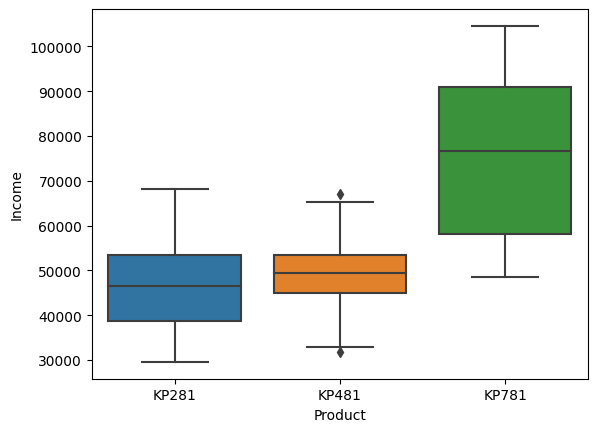

In [10]:
sns.boxplot(data = df, x = 'Product', y = 'Income')

<Axes: xlabel='Product', ylabel='Age'>

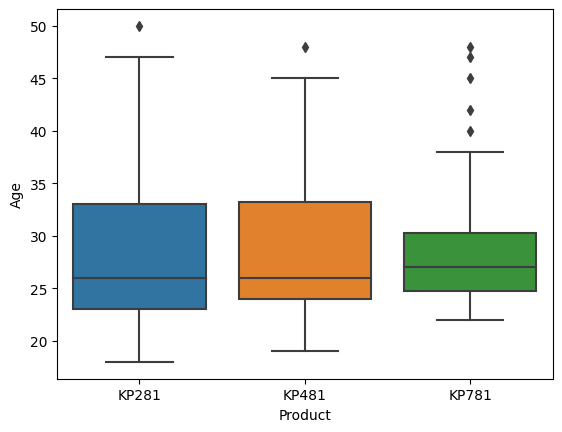

In [8]:
sns.boxplot(data = df, x = 'Product', y = 'Age')

<Axes: xlabel='Product', ylabel='Education'>

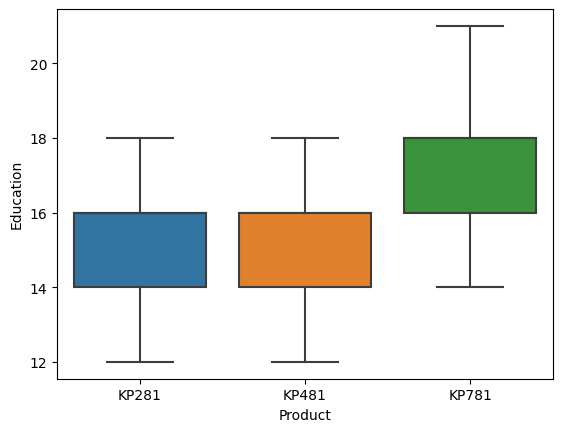

In [9]:
sns.boxplot(data = df, x = 'Product', y = 'Education')

In [11]:
df.loc[df['Product']=='KP281'].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


In [12]:
df.loc[df['Product']=='KP481'].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


In [13]:
df.loc[df['Product']=='KP781'].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


## Observation

- With the observation from the box plot there isn't any considerable ouliers with respect to Income and Education.
- The Age has some outliers for all the three products.

### 3.  Effect of Marital Status, Age on product purchase

<Axes: xlabel='Product', ylabel='count'>

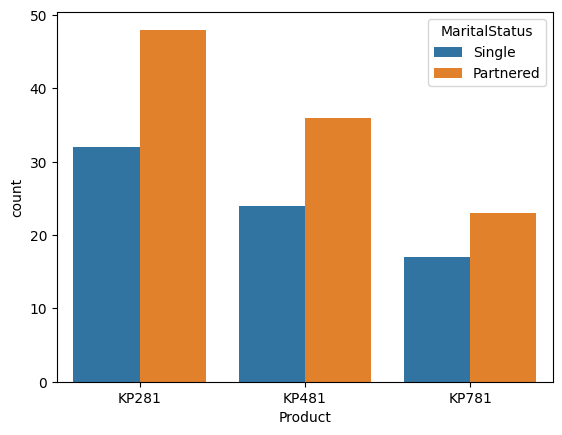

In [14]:
sns.countplot(data = df, x = 'Product', hue = 'MaritalStatus')

<Axes: xlabel='MaritalStatus', ylabel='Count'>

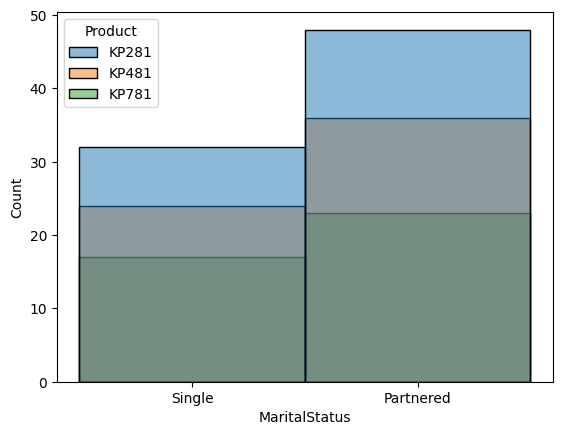

In [37]:
sns.histplot(data = df, x = 'MaritalStatus', hue = 'Product')

<Axes: xlabel='Product', ylabel='count'>

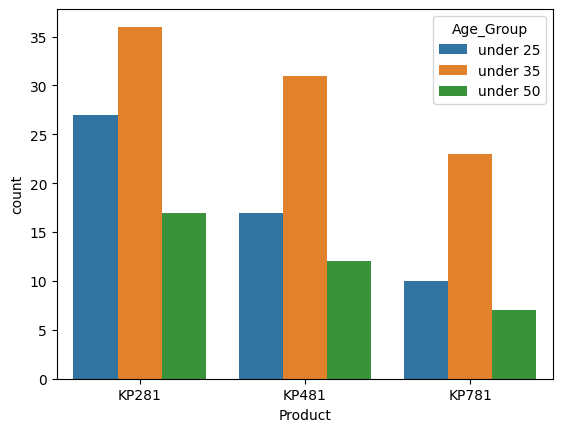

In [64]:

sns.countplot(data = df, x = 'Product', hue = 'Age_Group')

<Axes: xlabel='Age_Group', ylabel='Count'>

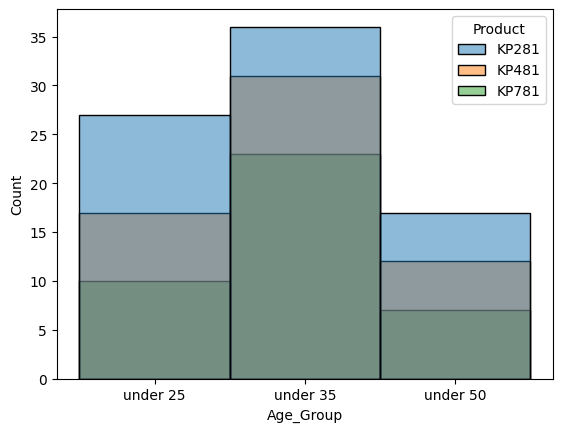

In [93]:
sns.histplot(data = df, x = 'Age_Group', hue = 'Product')

## Observation 

- The marital status of the customer clearly impacts the purchase of all the three products. Married people are more prone to become customers.
- For better analysis Age has been divided into three categories such as less than 25 years, between 25 and 34 years and customers between 35 and 50 years old.
- Customers in the second group in the age abetween 25 and 34 tend to purchase a product from given three products compared to other age groups. 
- More number of customers lie in the second category.

### 4. Marginal Probablity of Product purchase

#### Categorization by Age Groups

In [65]:
df1 = df.groupby(['Product', 'Age_Group']).agg({'Age': 'count'}).reset_index()
df1.rename(columns = {'Age': 'Count'}, inplace = True)
pd.crosstab(
    df1['Product'], 
    df1['Age_Group'], 
    values = df1['Count'], 
    aggfunc= lambda x: round(x.sum()/df1['Count'].sum()*100,2), 
    colnames = ['Purchase %'], 
    margins = True,
    margins_name = 'Totals'
    )

Purchase %,under 25,under 35,under 50,Totals
Product,,,,
KP281,15.00,20.00,9.44,44.44
KP481,9.44,17.22,6.67,33.33
KP781,5.56,12.78,3.89,22.22
Totals,30.00,50.00,20.00,100.00


## Observation

- Based on the analysis 50% of the customers belong to the age group between 25 and 34 yearr ans 30% belong to the age group under 25 years.
- 44.44% of the customers purchase the KP281 treadmill.
- The highest probablity of a customer to purchase KP781 treadmill which is the expensive in the given range of products is that the customer should belong to the age group between 25 and 34 years when compared to other age groups.

#### Categorization by Marital Status

In [66]:
df2 = df.groupby(['Product', 'MaritalStatus']).agg({'Age': 'count'}).reset_index()
df2.rename(columns = {'Age': 'Count'}, inplace = True)
pd.crosstab(
    df2['Product'], 
    df2['MaritalStatus'], 
    values = df2['Count'], 
    aggfunc= lambda x: round(x.sum()/df2['Count'].sum()*100,2), 
    colnames = ['Purchase %'], 
    margins = True,
    margins_name = 'Totals'
    )

Purchase %,Partnered,Single,Totals
Product,,,
KP281,26.67,17.78,44.44
KP481,20.00,13.33,33.33
KP781,12.78,9.44,22.22
Totals,59.44,40.56,100.00


## Observation

- Almost 60% of the current customers are married, out of which 45% of the customers tend to purchase the product KP281.
- And 40% of the customers are single and out of which 43.8% of the customers choose the product KP281.
- No matter whether the customers are married or single the product KP281 is most likely to be chosen by the customers.

#### Categorization by Income Group

In [69]:
df3 = df.groupby(['Product', 'Income_Group']).agg({'Age': 'count'}).reset_index()
df3.rename(columns = {'Age': 'Count'}, inplace = True)
pd.crosstab(
    df3['Product'], 
    df3['Income_Group'], 
    values = df3['Count'], 
    aggfunc= lambda x: round(x.sum()/df3['Count'].sum()*100,2), 
    colnames = ['Purchase %'], 
    margins = True,
    margins_name = 'Totals'
    )

Purchase %,under 50k,under 60k,under 80k,under 105k,Totals
Product,,,,,
KP281,26.67,14.44,3.33,0.00,44.44
KP481,16.67,12.78,3.89,0.00,33.33
KP781,2.78,3.33,5.56,10.56,22.22
Totals,46.11,30.56,12.78,10.56,100.00


## Observation

- From the given dataset 46.11% of the customers belong to the income category under 50k.
- 47.5% of the customers who purchased the most expensive product KP781 treadmill belongs to the income category between 80k and 105k. 
- All the customers who belong to the highest income category has purchased the most expensive product.
- Only 6% of the customers from the lowest income group have chosen the most expensive product KP781.

#### Categorization by Gender

In [70]:
df4 = df.groupby(['Product', 'Gender']).agg({'Age': 'count'}).reset_index()
df4.rename(columns = {'Age': 'Count'}, inplace = True)
pd.crosstab(
    df4['Product'], 
    df4['Gender'], 
    values = df4['Count'], 
    aggfunc= lambda x: round(x.sum()/df4['Count'].sum()*100,2), 
    colnames = ['Purchase %'], 
    margins = True,
    margins_name = 'Totals'
    )

Purchase %,Female,Male,Totals
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
Totals,42.22,57.78,100.00


## Observation

- The males dominate the customer count by accounting to 57.78% of the total customers.
- The probablity of male customer buying a KP781 treadmill is 0.32.
- The probablity of a female customer buying the expensive treadmill KP781 is just 0.09.

### 5. Correlation between factors

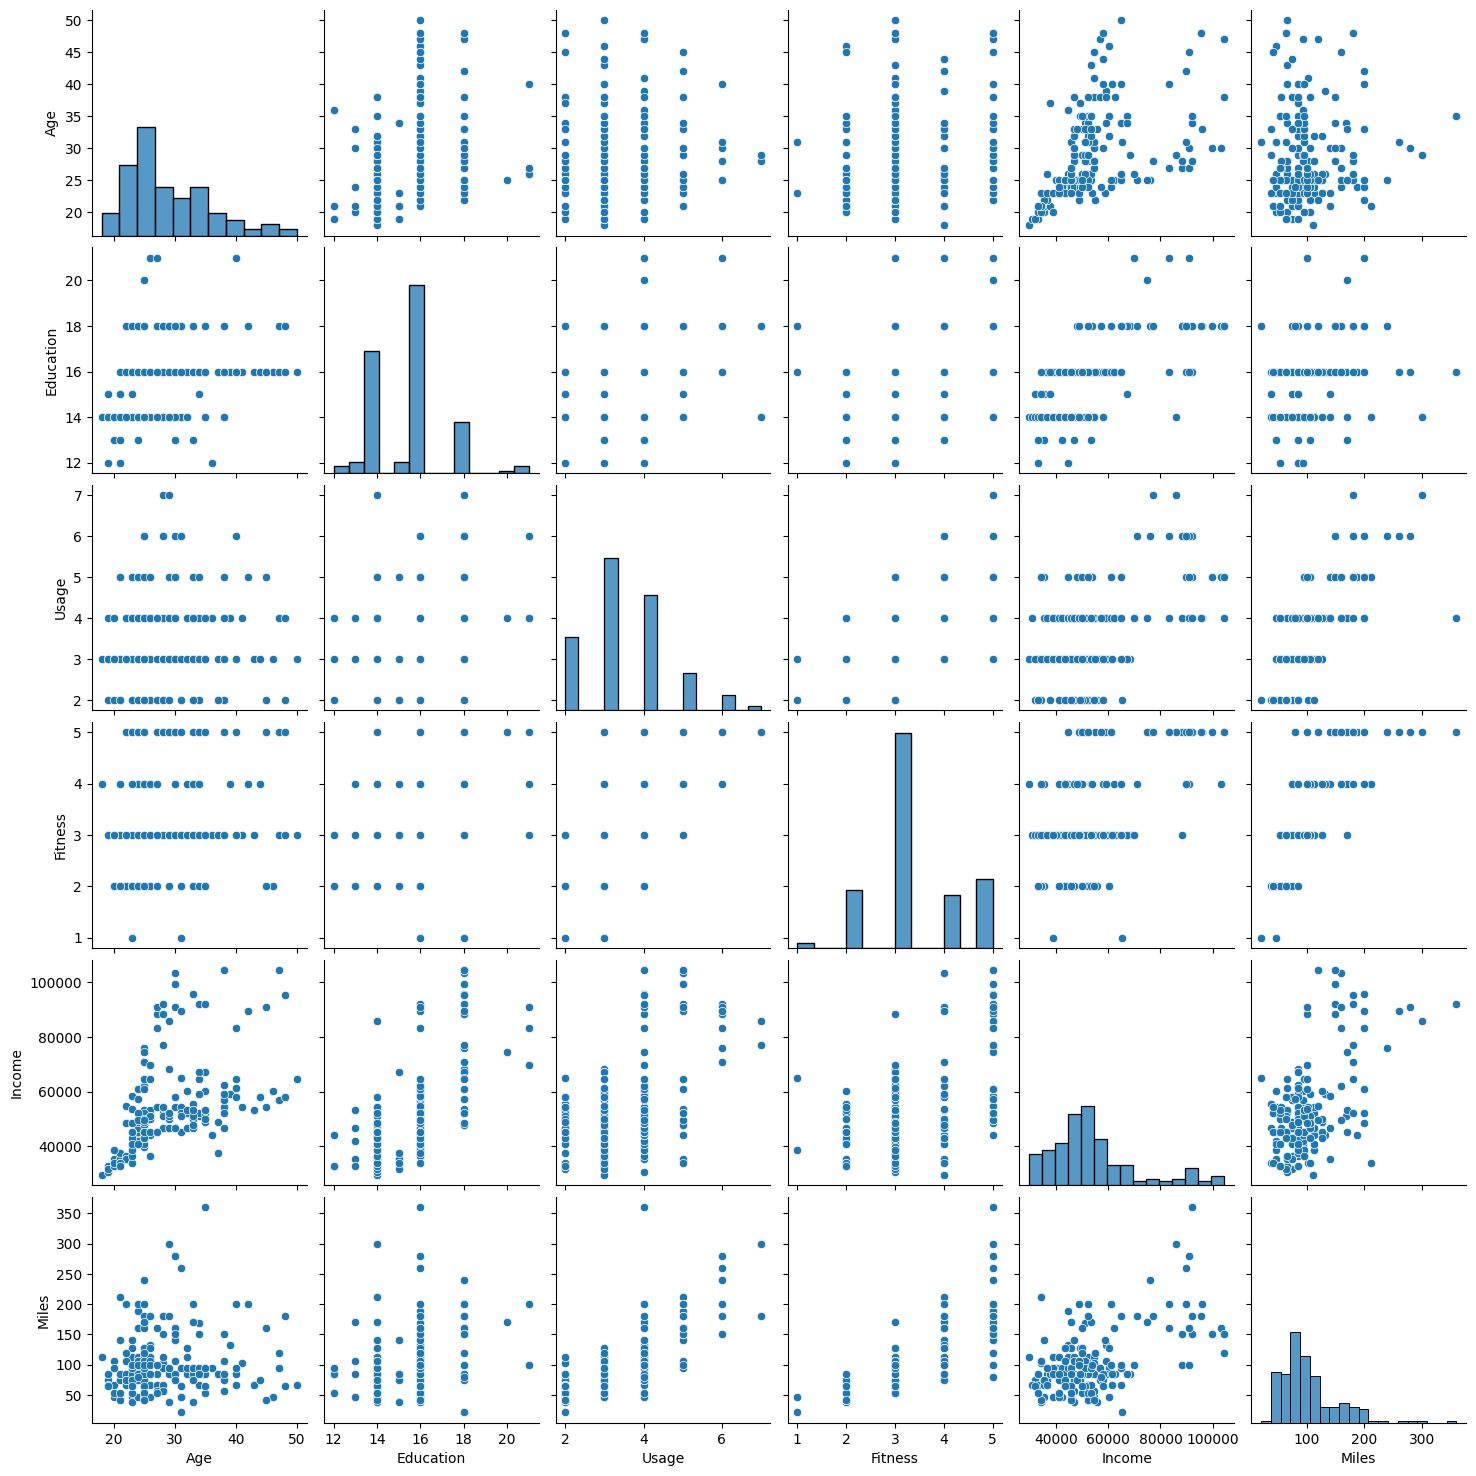

In [23]:
sns.pairplot(df)

## Observation

- From the pairplot we can find that there's a correlation between the age and income which can be plotted using a scatter plot to have a better understanding

<Axes: xlabel='Age', ylabel='Income'>

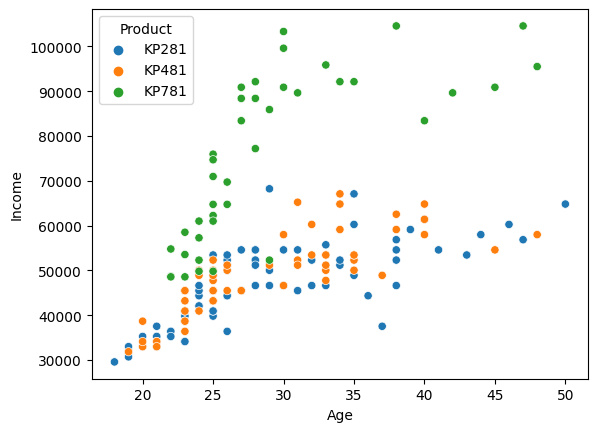

In [96]:
sns.scatterplot(data = df, x = 'Age', y = 'Income', hue='Product')

## Observation

- It can be observed from the chart that as age increases the income has increased.
- Most of the customers who've purchased the expensive product KP781 belong to the income more than 50k.
- Most potential customers belong to the age group between 23 and 38.

<Axes: xlabel='Age_Group', ylabel='Product'>

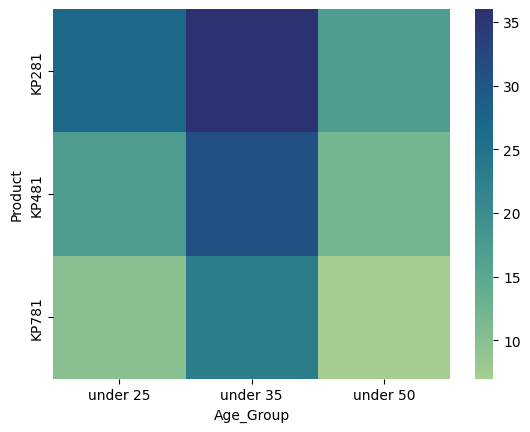

In [88]:
data1 = df1.pivot('Product', 'Age_Group', 'Count')
sns.heatmap(data1, cmap = 'crest')

<Axes: xlabel='MaritalStatus', ylabel='Product'>

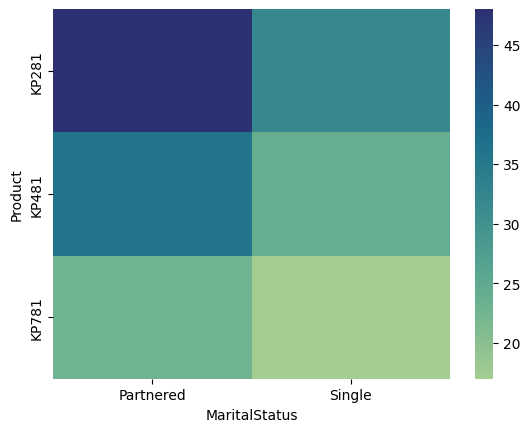

In [89]:
data2 = df2.pivot('Product', 'MaritalStatus', 'Count')
sns.heatmap(data2, cmap = 'crest')

<Axes: xlabel='Income_Group', ylabel='Product'>

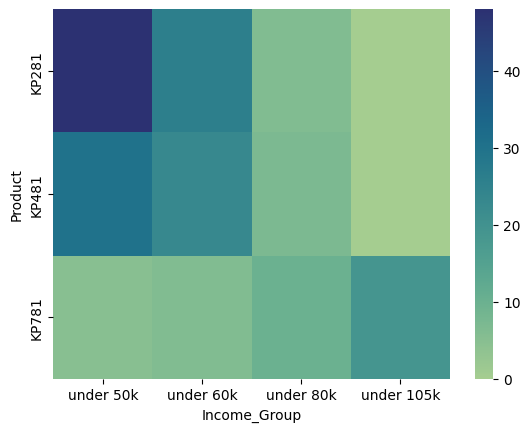

In [90]:
data3 = df3.pivot('Product', 'Income_Group', 'Count')
sns.heatmap(data3, cmap = 'crest')

## Observation

- Most famous product among the customers is KP281 treadmill. 
- Most of the customers belong to the age group between 25 and 34 years old.
- Most of the customers are married.

## Overall Insights and recommendations

### Insights:

- The marital status of the customer clearly impacts the purchase of all the three products. Married people are more prone to become customers.
- For better analysis Age has been divided into three categories such as less than 25 years, between 25 and 34 years and customers between 35 and 50 years old.
- Customers in the second group in the age abetween 25 and 34 tend to purchase a product from given three products compared to other age groups. To be more precise the scatter plot shows that most of the customers afrom the age between 23 and 38.
- 44.44% of the customers purchase the KP281 treadmill which makes it the most famous product among the customers.
- Almost 60% of the current customers are married, out of which 45% of the customers tend to purchase the product KP281.
- And 40% of the customers are single and out of which 43.8% of the customers choose the product KP281.
- No matter whether the customers are married or single the product KP281 is most likely to be chosen by the customers.
- From the given dataset 46.11% of the customers belong to the income category under 50k.
- 47.5% of the customers who purchased the most expensive product KP781 treadmill belongs to the income category between 80k and 105k. 
- All the customers who belong to the highest income category has purchased the most expensive product.
- Only 6% of the customers from the lowest income group have chosen the most expensive product KP781.
- The probablity of male customer buying a KP781 treadmill is 0.32 and the probablity of a female customer buying the expensive treadmill KP781 is just 0.09 which means female customers prefer less expensive treadmills.
- There is a correlation between age and the income, as age increases income has increased.
- Most of the customers who've purchased the expensive product KP781 belong to the income more than 50k.
- Most potential customers belong to the age group between 23 and 38.

## Recommendations:

- Since most of the customers prefer the less expensive products, in case if there's a possibility to increase the range of prodcuts, the advice is to go for products in the price range of 1500 and 1750 dollars.
- The expensive product is purchased by the elder people and those who belong to the high income group and hence the budget to market the product should be spent to reach the high profile people with high income groups.
- As per the given dataset most of the customers belong to the age beween 23 and 38 who are more prone to be our customers. This should be communicated to the marketing team so that appropriate measures be taken to focus on this age group.

In [6]:
pd.crosstab(index = df['Gender'], columns = df['Product'], margins = True, normalize = 'index' )*100

Product,KP281,KP481,KP781
Gender,,,
Female,52.631579,38.157895,9.210526
Male,38.461538,29.807692,31.730769
All,44.444444,33.333333,22.222222


In [7]:
pd.crosstab(index = df['Gender'], columns = df['Product'], margins = True, normalize = 'columns' )*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,50.0,48.333333,17.5,42.222222
Male,50.0,51.666667,82.5,57.777778


In [8]:
pd.crosstab(index = df['Gender'], columns = df['Product'], margins = True, normalize = True )*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


In [ ]:
1. 52% 0f the females bought KP281 and 38% of feamles bought KP481 and only 9% bought KP781
2.